### Project Scenario
-------------------------
#### Our corporate client Used-Car Online Pty Ltd (UCO) is asking us to provide a comprehensive data analysis of the used car online market in USA, according to the dataset file named ‘Vehicles.csv’. UCO requires us the following:
    •	Demonstrate a clear data frame to list ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'description', 'county', 'state', 'lat', 'long', 'posting_date']
    •	Summarize key information:
    •	Which type of cars were mostly listed - Anjana
    •	What is the most popular color listed - Deon
    •       Correlation between odometer (kms run) and price of the car. – Dhiraj
    •	

#### Based on the listed key information, UCO requests us to find out:

    What is the most profitable way to sell cars online in USA market? This may include:
    •	Saturation in the market
    •	What types of colors are popular
    •	Which type of cars are most listed
    •	Which state is the most potential market

In [75]:
# Dependencies
import os
import pandas as pd
import geoviews as gv
import hvplot.pandas
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

### Clean Dataset 'vehicles.csv'

    Dataset Source from: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data?resource=download

In [76]:
# Get raw dataset 'vehicles.csv'
vehicles_data = os.path.join("Resources", "vehicles.csv")
vehicles_df = pd.read_csv(vehicles_data)
vehicles_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [77]:
# Columns in raw dataset 
vehicles_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [78]:
# Delete some unuseful data columns
vehicles_column = vehicles_df.drop(["url", "region_url", "image_url", "description", "county", "VIN"], axis = 1)
vehicles_column.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [79]:
# Numbers of used-car listed in the dataset without dropna
vehicles_column.count()

id              426880
region          426880
price           426880
year            425675
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
drive           296313
size            120519
type            334022
paint_color     296677
state           426880
lat             420331
long            420331
posting_date    426812
dtype: int64

In [80]:
# Delet duplicate series in the dataset
vehicles_duplicate = vehicles_column[vehicles_column.duplicated(subset = ["id"])]
vehicles_duplicate["id"].unique()

array([], dtype=int64)

In [81]:
# Dropna in the dataset
vehicles_na = vehicles_column.dropna(how = "any")
vehicles_na

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.518900,2021-05-03T14:02:03-0500
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200,2021-04-29T17:19:18-0500
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.461820,2021-04-27T12:20:01-0500
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.401600,2021-04-26T11:15:36-0500
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.770400,2021-04-24T18:39:59-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,7302963673,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,wy,43.452800,-110.739300,2021-04-06T21:04:03-0600
426809,7302963273,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,wy,43.452800,-110.739300,2021-04-06T21:02:26-0600
426831,7302384818,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,wy,41.143700,-104.796200,2021-04-05T18:10:52-0600
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy,43.642930,-108.222976,2021-04-05T16:29:38-0600


In [82]:
# Numbers of used-car listed after data clean
vehicles_na.count()

id              79016
region          79016
price           79016
year            79016
manufacturer    79016
model           79016
condition       79016
cylinders       79016
fuel            79016
odometer        79016
title_status    79016
transmission    79016
drive           79016
size            79016
type            79016
paint_color     79016
state           79016
lat             79016
long            79016
posting_date    79016
dtype: int64

In [83]:
# Find used-car made after year 2000
vehicles_sorted = vehicles_na[(vehicles_na["year"] >= 2000) & (vehicles_na["year"] <= 2022)]
vehicles_sorted.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [84]:
# Remove the outlier price
vehicles_price_out = vehicles_sorted[((vehicles_sorted["price"] != 1234) &
                                  (vehicles_sorted["price"] != 12345) &
                                  (vehicles_sorted["price"] != 123456) &
                                  (vehicles_sorted["price"] != 1234567) &
                                  (vehicles_sorted["price"] != 12345678) &
                                  (vehicles_sorted["price"] != 123456789) &
                                  (vehicles_sorted["price"] != 1234567890))]
vehicles_price_out.head()

# Remove the outlier price
vehicles_price = vehicles_price_out[((vehicles_sorted["price"] > 1000) & (vehicles_sorted["price"] < 200000))]
vehicles_price.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [85]:
# Create a dataset after data clean with dropna, duplicate and unique function
vehicles_cleaned_df = vehicles_price.reset_index(drop = True)
vehicles_cleaned_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
1,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
2,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
3,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
4,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [86]:
# Numbers of used-car listed after data clean & made in 2000 and afterward
vehicles_cleaned_df.count()

id              66325
region          66325
price           66325
year            66325
manufacturer    66325
model           66325
condition       66325
cylinders       66325
fuel            66325
odometer        66325
title_status    66325
transmission    66325
drive           66325
size            66325
type            66325
paint_color     66325
state           66325
lat             66325
long            66325
posting_date    66325
dtype: int64

In [87]:
# saved the cleaned dataset into output_data folder and ready for data analysis
vehicles_cleaned_df.to_csv("output_data/vehicles_cleaned.csv")

### Something the branch InaLuo2022 is working on to find out the question:

#### The top 10 state ranking by number of vehicle listed and their corrlation with the population of each state

EDA Methodology:
-	upper(): to capitalize the state abbreviation in the column of ‘state’ 
-	groupby(): to create a new data frame ‘geo_df’ with ‘state’ as an index and 3 columns ‘lat’, ‘long’ and ‘Total_Listed’
-	sort_values(by=‘Total_Listed’) and head(10): to find the top 10 states ranking by the number of vehicles listed
-	merge(), loc() & for loop: to merge cleaned vehicle data with USA population & state abbreviation datasets
-	stats.pearsonr(),stats.linregress(): to calculate correlation coefficient and linear regression 

In [88]:
# Upper the state abbreviation
vehicles_cleaned_df['state'] = vehicles_cleaned_df['state'].str.upper()
vehicles_cleaned_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,AL,32.592000,-85.51890,2021-05-03T14:02:03-0500
1,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,AL,32.547500,-85.46820,2021-04-29T17:19:18-0500
2,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,AL,32.628739,-85.46182,2021-04-27T12:20:01-0500
3,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,AL,32.630400,-85.40160,2021-04-26T11:15:36-0500
4,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,AL,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [89]:
# Create a new dataframe geo_df with geographic allocation lantitude and longtitude for the listed used car by groupby operations
lat = vehicles_cleaned_df.groupby(['state']).mean()['lat']
geo_df = lat.to_frame()
long = vehicles_cleaned_df.groupby(['state']).mean()['long']
list_number = vehicles_cleaned_df.groupby(['state']).count()['id']
geo_df['long'] = long.values
geo_df['Total_Listed'] = list_number.values
geo_df.head(10)

,lat,long,Total_Listed
state,,,
AK,61.046965,-149.282636,586
AL,33.621473,-85.842648,730
AR,35.456646,-93.790880,466
AZ,33.435729,-111.812439,1339
CA,36.324448,-119.587934,7113
CO,39.403061,-105.375646,1469
CT,41.599332,-72.871252,768
DC,38.835992,-77.353169,439
DE,39.673995,-75.246419,207


In [90]:
# Count total number of states in the data frame
geo_df.count()['Total_Listed']

51

In [91]:
# Sort the geo_df and find the top 10 states ranking by number of vehicle listed
geo_df = geo_df.sort_values(by=['Total_Listed'], ascending=False)
geo_df_top10 = geo_df.head(10)
geo_df_top10

,lat,long,Total_Listed
state,,,
CA,36.324448,-119.587934,7113
FL,28.327125,-81.939184,4811
NY,42.201423,-75.276922,3858
TX,30.797966,-98.657308,3190
OH,40.460017,-82.662670,3180
MI,42.909159,-84.302476,2599
NC,35.629281,-80.045570,2410
PA,40.534228,-76.997656,2398
WI,43.716192,-88.856548,2232


In [92]:
# Calculate the % of Top 10 & Top 3 listed vehicles with the total number of listed vehicles
Top10_vs_all = geo_df_top10.sum()['Total_Listed'] / geo_df.sum()['Total_Listed'] * 100
"{:,}%".format(round(Top10_vs_all ,2))

Top3_vs_Top10 = (geo_df_top10.iloc[0]['Total_Listed'] + geo_df_top10.iloc[1]['Total_Listed'] \
    + geo_df_top10.iloc[0]['Total_Listed']) / geo_df_top10.sum()['Total_Listed'] * 100 
"{:,}%".format(round(Top3_vs_Top10,2))

Top3_vs_all = (geo_df_top10.iloc[0]['Total_Listed'] + geo_df_top10.iloc[1]['Total_Listed'] \
    + geo_df_top10.iloc[0]['Total_Listed']) / geo_df.sum()['Total_Listed'] * 100
"{:,}%".format(round(Top3_vs_all,2))

print(f'The top 10 state ranking by their number of listed vehicles shows in the fig Top10_Listed.png.')
print(f'The top 10 state has occupied {"{:,}%".format(round(Top10_vs_all ,2))} of the total number of liested vehicles.')
print(f'Especially {geo_df_top10.index[0:3].values} listed {"{:,}%".format(round(Top3_vs_Top10,2))} of total number of top 10 vehicles.')
print(f'The top 3 states also held {"{:,}%".format(round(Top3_vs_all,2))} vehicles vs number listed for all USA states.')

The top 10 state ranking by their number of listed vehicles shows in the fig Top10_Listed.png.
The top 10 state has occupied 50.71% of the total number of liested vehicles.
Especially ['CA' 'FL' 'NY'] listed 56.6% of total number of top 10 vehicles.
The top 3 states also held 28.7% vehicles vs number listed for all USA states.


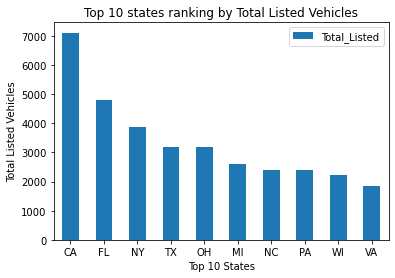

In [93]:
# Bar chart for Top10 list car and those states
geo_df_top10.plot.bar(y='Total_Listed',rot=0)
plt.xlabel('Top 10 States')
plt.ylabel('Total Listed Vehicles')
plt.title('Top 10 states ranking by Total Listed Vehicles')

# Save the figure
plt.savefig("output_data/Top10_Listed.png")

### Summary: 
#### The top 10 states have occupied more than half of the total number of listed vehicles. Especially the top 3 states California, Florida & New York State. The top 3 states share nearly one-third of listed vehicle numbers and generally consider California will be the biggest potential market followed by Floria & New York States. And the other states in the top 10 could be covered in the 2nd stage of marketing strategical development.

In [94]:
# Geographic location for top 10 states
map_plot_1 = geo_df_top10.hvplot.points('long', 'lat', geo=True, color='red', alpha=0.2,
                       xlim=(-140, -50), ylim=(0, 55), xlabel= 'Longitude', ylabel='Latitude', tiles='OSM',  
                       size = "Total_Listed", frame_width=800)

map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [long,lat]   (Total_Listed)

In [95]:
print(f'The hvplot with the open map shows the geographical location of the top 10 states by their longitude and latitude. \
It is obvious to find out the top 10 states mainly located on the eastern or western coasts of USA. The size of the bubble \
reflects the total number of listed vehicles. This will be clearly identified that Califonia held the largest number of listed \
vehicles followed by Florida and New York State.')

The hvplot with the open map shows the geographical location of the top 10 states by their longitude and latitude. It is obvious to find out the top 10 states mainly located on the eastern or western coasts of USA. The size of the bubble reflects the total number of listed vehicles. This will be clearly identified that Califonia held the largest number of listed vehicles followed by Florida and New York State.


## to run 'from bokeh.io import export_svg' please do: pip install selenium in git bash

In [96]:
# save fig into output_data folder
from bokeh.io import export_svg
hvplot.save(map_plot_1, 'output_data/Top10_state.png')

### import a dataset regarding USA population names 'data.csv' for merging with 'Total_listed' data and complete correlation analysis
        Dataset Source from: https://worldpopulationreview.com/states/state-abbreviations
                             https://worldpopulationreview.com/states

In [97]:
# Get raw dataset USA State population list named 'data.csv'
usa_population_data = os.path.join("Resources", "data.csv")
usa_population_df = pd.read_csv(usa_population_data)
usa_population_df = usa_population_df.sort_values('state')
usa_population_df.head()

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,area,rank,percent
23,1,Alabama,100.65438,5097641,5073187,5024279,4999822,4779736,0.00482,24454,0.06651,50645,24,0.015102
47,2,Alaska,1.29738,740339,738023,733391,731075,710231,0.00314,2316,0.04239,570641,48,0.002193
13,4,Arizona,64.96246,7379346,7303398,7151502,7075549,6392017,0.01040,75948,0.15446,113594,14,0.021862
32,5,Arkansas,58.42619,3040207,3030646,3011524,3001967,2915918,0.00315,9561,0.04262,52035,33,0.009007
0,6,California,258.20877,40223504,39995077,39538223,39309799,37253956,0.00571,228427,0.07971,155779,1,0.119165


In [98]:
# Get raw dataset USA State abbreviation list named 'data_abb.csv.csv'
usa_abb_data = os.path.join("Resources", "data_abb.csv")
usa_abb_df = pd.read_csv(usa_abb_data)
usa_abb_df.head()

,state,abbrev,code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [99]:
# Merge two data frame USA population and state abbreviation into a data frame
usa_population_df = usa_abb_df.merge(usa_population_df)
usa_population_df.head()

,state,abbrev,code,fips,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,area,rank,percent
0,Alabama,Ala.,AL,1,100.65438,5097641,5073187,5024279,4999822,4779736,0.00482,24454,0.06651,50645,24,0.015102
1,Alaska,Alaska,AK,2,1.29738,740339,738023,733391,731075,710231,0.00314,2316,0.04239,570641,48,0.002193
2,Arizona,Ariz.,AZ,4,64.96246,7379346,7303398,7151502,7075549,6392017,0.01040,75948,0.15446,113594,14,0.021862
3,Arkansas,Ark.,AR,5,58.42619,3040207,3030646,3011524,3001967,2915918,0.00315,9561,0.04262,52035,33,0.009007
4,California,Calif.,CA,6,258.20877,40223504,39995077,39538223,39309799,37253956,0.00571,228427,0.07971,155779,1,0.119165


In [100]:
# Merge 'Total_Listed' data into USA population dataset by state
usa_population_df['Total_Listed'] = '0'
for i in range(39):
    j = geo_df.index[i]
    usa_population_df['Total_Listed'].loc[usa_population_df['code'] == j]= geo_df.loc[geo_df.index == j]['Total_Listed'].values
usa_population_df = usa_population_df.sort_values(by='rank')
usa_population_df.head(10)

,state,abbrev,code,fips,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,area,rank,percent,Total_Listed
4,California,Calif.,CA,6,258.20877,40223504,39995077,39538223,39309799,37253956,0.00571,228427,0.07971,155779,1,0.119165,7113
42,Texas,Tex.,TX,48,116.16298,30345487,29945493,29145505,28745507,25145561,0.01336,399994,0.20679,261232,2,0.089901,3190
8,Florida,Fla.,FL,12,416.95573,22359251,22085563,21538187,21264502,18801310,0.01239,273688,0.18924,53625,3,0.066241,4811
31,New York,N.Y.,NY,36,433.90472,20448194,20365879,20201249,20118937,19378102,0.00404,82315,0.05522,47126,4,0.060579,3858
37,Pennsylvania,Pa.,PA,42,292.62222,13092796,13062764,13002700,12972667,12702379,0.00230,30032,0.03074,44743,5,0.038788,2398
12,Illinois,Ill.,IL,17,230.67908,12807072,12808884,12812508,12814324,12830632,-0.00014,-1812,-0.00184,55519,6,0.037942,1404
34,Ohio,Ohio,OH,39,290.70091,11878330,11852036,11799448,11773150,11536504,0.00222,26294,0.02963,40861,7,0.035190,3180
9,Georgia,Ga.,GA,13,191.59470,11019186,10916760,10711908,10609487,9687653,0.00938,102426,0.13745,57513,8,0.032645,753
32,North Carolina,N.C.,NC,37,220.30026,10710558,10620168,10439388,10348993,9535483,0.00851,90390,0.12323,48618,9,0.031731,2410
21,Michigan,Mich.,MI,26,179.26454,10135438,10116069,10077331,10057961,9883640,0.00191,19369,0.02548,56539,10,0.030027,2599


In [101]:
# Calculate the correlation coefficient and linear regression model for number of 'Total_listed' \
# car and USA population in 2022 
x=usa_population_df['pop2022']
y=usa_population_df['Total_Listed'].astype(int)
pearsonr = st.pearsonr(x, y)
print(f'The Pearson correlation coefficient for mouse weight and average tumour volume in the Capomulin regimen is \
{round(pearsonr[0],2)}')

The Pearson correlation coefficient for mouse weight and average tumour volume in the Capomulin regimen is 0.89


In [102]:
# Calculate the correlation coefficient and linear regression model for number of 'Total_listed' \
# car vs USA population in 2022 
slope, intercept, r, p, std_err = st.linregress(x, y)

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

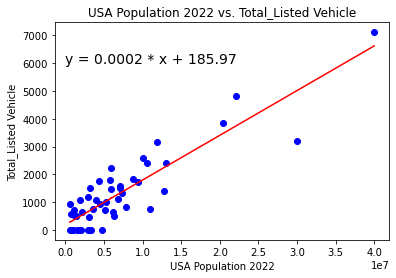

In [103]:
# Plot out number of 'Total_listed' car vs USA population in 2022
plt.scatter(x, y,c='b')
plt.plot(x, linearRegression_list,c='r')
plt.xlabel('USA Population 2022')
plt.ylabel('Total_Listed Vehicle')
plt.title('USA Population 2022 vs. Total_Listed Vehicle')
plt.annotate(f'y = {round(slope,4)} * x + {round(intercept,2)}',(20,6000), fontsize=14)

# Save the figure
plt.savefig("output_data/population_Total_Listed.png")

plt.show()

### Summary: 
#### The Pearson’s r is 0.89 and means a fairly strong positive relationship between the population and the number of listed vehicles. This reminds us to focus on developing online sales markets in the states with a larger population.  

In [104]:
# Calculate the correlation coefficient and linear regression model for number of 'Total_listed' vehicles \
# and population density of state
x=usa_population_df['densityMi']
y=usa_population_df['Total_Listed'].astype(int)
pearsonr = st.pearsonr(x, y)
print(f'The Pearson correlation coefficient for number of Total_listed car and population density in 2022 \
is {round(pearsonr[0],2)}')

The Pearson correlation coefficient for number of Total_listed car and population density in 2022 is 0.18


In [105]:
# Calculate the correlation coefficient and linear regression model for number of 'Total_listed' vehicles \
# vs population density of state
slope, intercept, r, p, std_err = st.linregress(x, y)

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))

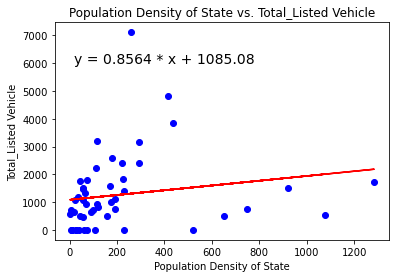

In [106]:
# Plot out number of 'Total_listed' vehicles vs population density of state
plt.scatter(x, y,c='b')
plt.plot(x, linearRegression_list,c='r')
plt.xlabel('Population Density of State')
plt.ylabel('Total_Listed Vehicle')
plt.title('Population Density of State vs. Total_Listed Vehicle')
plt.annotate(f'y = {round(slope,5)} * x + {round(intercept,2)}',(20,6000), fontsize=14)

# Save the figure
plt.savefig("output_data/Population_Density_Total_Listed.png")

plt.show()

### Summary: 
#### The Pearson’s r is 0.17 only. The value is considered to be a weak correlation between the population density of the state and the total listed vehicles. The population density will not the factor to affect the used vehicle market in USA

## Which state is the most potential market?
### The top 3 potential market in California, Florida, and New York State. These top 3 states are occupied one-third of the total listed vehicles. Geographically, the states located on the western and eastern coasts will be considered better potential markets than inland areas. The Pearson correlation coefficient of 0.89 between the population in 2022 and the total listed vehicles tell us the strong relationship and the states with larger population may be better potential markets but it will not be necessary to consider the population density of states.
